In [8]:
def gen(n, p):
    ! mkdir -p ./contest/{n}
    ! [[ ! -e ./contest/{n}/{p}.cpp ]] && cp ./template.cpp ./contest/{n}/{p}.cpp
    ! touch ./contest/{n}/{p}.txt

gen('1905', 'a')

# 2024.02

## Codeforces Round 917 (Div. 2)

URL: https://codeforces.com/contest/1917

### 1917C

- n個の数列A
- n<2000
- 最大値

```
a=[1,2,3], b=[1,3,2,3,1,3,2,3,…]
1: s=3; a=[0,0,0]
3: a=[1,1,1]
2: a=[2,2,1]
3: s=1; a=[0,0,0]
res=4
```

- i番目の要素を増やせるのはi <= b[i]のとき
- 番号が大きいほど増やしにくい
- resetするまでシミュレーション
- [0,0,...]以降
    - 最適な数列が増加列であるのに対して操作後に得られるのは減少列
    - 毎回resetを繰り返すような形が最適


## Codeforces Round 915 (Div. 2)

https://codeforces.com/contest/1905

### A. Constructive Problems

- n*mの行列

### B. Begginer's Zelda

- 木が与えられる
- 指定した2頂点を結ぶ経路を圧縮できる
- すべて圧縮して単一頂点にしたい
- 葉要素の個数に比例

# 5: 2024.02

skip

- https://codeforces.com/contest/1687/problem/A

## ./problemset/202402.121934

### https://codeforces.com/contest/1815/problem/A

- [file](./problemset/202402.121934/1815a.cpp)
- n個の数列
- 隣接する要素を+1か-1できる
- 数列を非減少列にできるか知りたい
- 差分をみる

### https://codeforces.com/contest/1883/problem/D

- [file](./problemset/202402.121934/1883d.cpp)
- リトライ
- multisetはerase(n)だと全部削除、1つだけ消したいときはerase(find(n))

### https://codeforces.com/contest/1713/problem/A

- [file](./problemset/202402.121934/1713a.cpp)
- グリッドの格子点を移動

### https://codeforces.com/contest/1919/problem/A

- [file](./problemset/202402.121934/1919a.cpp)
- リトライ
- 和の偶奇

### https://codeforces.com/contest/1798/problem/B

- [file](./problemset/202402.121934/1798b.cpp)
- くじがm日間 + N[i]人参加 + 誰かが勝利する + 勝者はそれ以降参加せず
- 各日の勝者を求めたい
- TLEしないように頑張る

## ./problemset/202402.103959

### https://codeforces.com/contest/1649/problem/B

- [file](./problemset/202402.103959/1649b.cpp)
- ボール1個で十分な条件を考える

### https://codeforces.com/contest/1748/problem/C

- [file](./problemset/202402.103959/1748c.cpp)
- n個の数列
- i番目までの要素の和が0になるインデックスの個数を最大化したい
- a[i]=0の箇所を任意の整数に入れ替えることができる

### https://codeforces.com/contest/1867/problem/C

- [file](./problemset/202402.103959/1867c.cpp)
- skip

### https://codeforces.com/contest/1883/problem/C

- [file](./problemset/202402.103959/1883c.cpp)
- n個の数列
- 任意の要素を1ずつ追加できる
- 積がkで割り切れるようにしたい

### https://codeforces.com/contest/1884/problem/A

- [file](./problemset/202402.103959/1884a.cpp)
- 全部試す

## 1: ./problemset/202402.1704721877

### https://codeforces.com/contest/1858/problem/A

- [file](./problemset/202402.1704721877/1858a.cpp)

### https://codeforces.com/contest/1842/problem/A

- [file](./problemset/202402.1704721877/1842a.cpp)
- n個の数列とm個の数列
- 和を取って大小比較
- STLにsum関数なかった
- C++17以降だとreduceが使えるっぽい

### https://codeforces.com/contest/1740/problem/B

- [file](./problemset/202402.1704721877/1740b.cpp)
- a[i]*b[i]の長方形がn個
- 回転できる
- 上には置けない
- 組み合わせてできる図形の周囲の長さを取りたい

### https://codeforces.com/contest/1777/problem/A

- [file](./problemset/202402.1704721877/1777a.cpp)
- n個の数列
- 隣接する要素の偶奇が異なるようにしたい

### https://codeforces.com/contest/1726/problem/A

- [file](./problemset/202402.1704721877/1726a.cpp)
- n個の数列
- 指定範囲をローテーションできる
- 最後と最初の要素の差を最大化したい
- 禁忌に気をつける

## 2: ./problemset/202402.093422

### https://codeforces.com/contest/1684/problem/C

- [file](./problemset/202402.093422/1684c.cpp)
- n * mのグリッド
- 適当な2列を入れ替えてソート済みにしたい

### https://codeforces.com/contest/1647/problem/A

- [file](./problemset/202402.093422/1647a.cpp)
- 各桁の総和がnになるものを最大化したい

### https://codeforces.com/contest/1687/problem/A

- [file](./problemset/202402.093422/1687a.cpp)
- skip

### https://codeforces.com/contest/1883/problem/D

- [file](./problemset/202402.093422/1883d.cpp)
- 重ならない線分があるかどうか判定したい
- 左端の最大値と右端の最小値を比較

### https://codeforces.com/contest/1637/problem/C

- [file](./problemset/202402.093422/1637c.cpp)
- n個の数列
- 端に寄せたい

# problemset.problems

In [65]:
import pandas as pd
import duckdb

df = pd.DataFrame(pd.read_json('./api/problemset.problems.json.gz').result.problems)

query = '''
    select
        *
    from
        df
    limit 1
'''
duckdb.connect().execute(query).df()

,contestId,index,name,type,points,rating,tags
0,1919,H,Tree Diameter,PROGRAMMING,5000.0,3500.0,"[interactive, trees]"


In [66]:
import pandas as pd
import duckdb

df = pd.DataFrame(pd.read_json('./api/problemset.problems.json.gz').result.problems)

query = '''
    select
        r,
        count(1) as cnt
    from
        (select
            cast(rating as int64) as r
        from
            df
        )
    group by
        r
    order by
        cnt desc
'''
duckdb.connect().execute(query).df()

,r,cnt
0,800.0,786
1,1600.0,454
2,1700.0,434
3,1900.0,434
4,2000.0,422
5,1800.0,418
6,1500.0,411
7,2400.0,397
8,2200.0,396
9,1300.0,384


In [70]:
import pandas as pd
import duckdb

df = pd.DataFrame(pd.read_json('./api/problemset.problems.json.gz').result.problems)

query = '''
    select
        *
    from
        df
    where
        rating between 1000 and 1600

    order by
        random()
    limit 5
'''
duckdb.connect().execute(query).df()

,contestId,index,name,type,points,rating,tags
0,1734,C,Removing Smallest Multiples,PROGRAMMING,1250.0,1200.0,"[greedy, math]"
1,683,A,The Check of the Point,PROGRAMMING,NaN,1200.0,"[*special, geometry]"
2,1619,C,Wrong Addition,PROGRAMMING,NaN,1200.0,[implementation]
3,710,C,Magic Odd Square,PROGRAMMING,NaN,1500.0,"[constructive algorithms, math]"
4,413,B,Spyke Chatting,PROGRAMMING,1000.0,1300.0,[implementation]


In [5]:
import pandas as pd
import duckdb

df = pd.DataFrame(pd.read_json('./api/problemset.problems.json.gz').result.problems)

query = '''
    select
        'https://codeforces.com/contest/' || contestId || '/problem/' || index as url,
        contestId || lower(index) as problem_id,
    from
        df
    where
        contestId >= 1623
        and len(index) = 1
        and points is not null
        and rating between 800 and 1600
    order by
        random()
    limit 5
'''

lines = []
ret = ! echo ./problemset/$(date +"%Y%W.%d%M%S")
d = ret[0]
lines.append(f'## {d}')
lines.append('')
! mkdir -p {d}
for _, r in duckdb.connect().execute(query).df().iterrows():
    lines.append(f'### {r.url}')
    
    ! cp ./template.cpp {d}/{r.problem_id}.cpp
    ! echo 1 > {d}/{r.problem_id}.txt
    lines.append(f'- [code]({d}/{r.problem_id}.cpp) / [input]({d}/{r.problem_id}.txt)')
    lines.append('')

print('\n'.join(lines))

## ./problemset/202402.133927

### https://codeforces.com/contest/1847/problem/B
- [code](./problemset/202402.133927/1847b.cpp) / [input](./problemset/202402.133927/1847b.txt)

### https://codeforces.com/contest/1706/problem/A
- [code](./problemset/202402.133927/1706a.cpp) / [input](./problemset/202402.133927/1706a.txt)

### https://codeforces.com/contest/1627/problem/A
- [code](./problemset/202402.133927/1627a.cpp) / [input](./problemset/202402.133927/1627a.txt)

### https://codeforces.com/contest/1799/problem/A
- [code](./problemset/202402.133927/1799a.cpp) / [input](./problemset/202402.133927/1799a.txt)

### https://codeforces.com/contest/1647/problem/B
- [code](./problemset/202402.133927/1647b.cpp) / [input](./problemset/202402.133927/1647b.txt)



## 2024.02

## ./problemset/202402.133927

### https://codeforces.com/contest/1847/problem/B
- [code](./problemset/202402.133927/1847b.cpp) / [input](./problemset/202402.133927/1847b.txt)
- n個の数列
- グループl,rの強さはビット積で定義
- 各グループの強さの総和を最小化しつつ、グループ数を最大化したい
- [2, 3, 1, 5, 2]のとき[2, 3, 1] + [5, 2]
- 全要素の積が最小値
- グループ分けは連続する要素のみなので前からやっていく
- 0にできないものは前のグループに入れる

### https://codeforces.com/contest/1706/problem/A
- [code](./problemset/202402.133927/1706a.cpp) / [input](./problemset/202402.133927/1706a.txt)
- n個の数列とm個の文字'B'からなる文字列
- a[i]番目か後ろからa[i]番目の文字を'A'に置き換えることができる
- 辞書順最小の文字列を得たい
- a[i]が前半なら前から交換 / 後半なら後ろから

### https://codeforces.com/contest/1627/problem/A
- [code](./problemset/202402.133927/1627a.cpp) / [input](./problemset/202402.133927/1627a.txt)
- n*mのグリッド
- 黒の部分を1箇所、縦か横に伸ばせる
- (r, c)を黒にする最小の操作回数を求めたい
- max 2

### https://codeforces.com/contest/1799/problem/A
- [code](./problemset/202402.133927/1799a.cpp) / [input](./problemset/202402.133927/1799a.txt)
- N個のポスト、それ以外のポストに反応がつくと最後尾はリストから除外される
- 最初のN個のポストがいつ除外されるか知りたい
- すでに登場しているときは除外が起きない

### https://codeforces.com/contest/1647/problem/B
- [code](./problemset/202402.133927/1647b.cpp) / [input](./problemset/202402.133927/1647b.txt)
- n*mのグリッド
- nice: 範囲内がすべて1、ほかの同様の範囲に含まれていない
- elegant: niceな範囲同士が重ならないこと
- 2x2に注目

In [104]:
import pandas as pd
import duckdb
import json

! curl -s 'https://codeforces.com/api/user.status?handle=sh19910711&from=1' | gzip > ./api/user.status.json.gz
df_problems = pd.DataFrame(list(pd.read_json('./api/problemset.problems.json.gz').result.problems))
df = pd.DataFrame(list(pd.read_json('./api/user.status.json.gz').result))
df_sub = pd.DataFrame(df[df.testset == 'TESTS'])
df_sub['problem_json'] = df_sub.problem.apply(lambda x: json.dumps(x))

df5 = duckdb.connect().execute(
'''
    with
        problems as
        (select
            contestId || index as problem_id,
            *
        from
            df_problems
        ),
        submissions as
        (select
            make_timestamp(creationTimeSeconds * 1000 * 1000) + interval 9 hours as created_at,
            json_extract_string(problem_json, '$.contestId') || json_extract_string(problem_json, '$.index') as problem_id,
            *
        from
            df_sub
        )
    select
        *
    from
        submissions
    join
        problems
    using (problem_id)
    where
        verdict = 'OK'
'''
).df()
df5[['created_at', 'rating']].sort_values(by='created_at', ascending=False).head(10)

,created_at,rating
40,2024-01-13 21:18:33,1200.0
15,2024-01-13 20:46:29,800.0
45,2024-01-13 20:32:58,800.0
21,2024-01-13 20:22:21,800.0
12,2024-01-13 19:25:33,1000.0
16,2024-01-13 18:29:56,1000.0
46,2024-01-13 18:02:39,800.0
20,2024-01-13 17:51:43,800.0
51,2024-01-13 17:37:12,1500.0
14,2024-01-12 22:14:34,1300.0


In [91]:
duckdb.connect().execute(
'''
    select
        dim,
        avg(rating) as avg_rating,
        median(rating) as med_rating,
        min(rating) as min_rating,
        max(rating) as max_rating,
        count(distinct problem_id) as cnt_problems,
    from
        (select
            strftime(created_at, '%Y%W') as dim,
            *
        from
            df5
        where
            year(created_at) >= 2024
        )
    group by
        dim
'''
).df()

,dim,avg_rating,med_rating,min_rating,max_rating,cnt_problems
0,202402,1041.666667,1000.0,800.0,1600.0,21
1,202401,920.000000,800.0,800.0,1400.0,4


<Axes: xlabel='dim'>

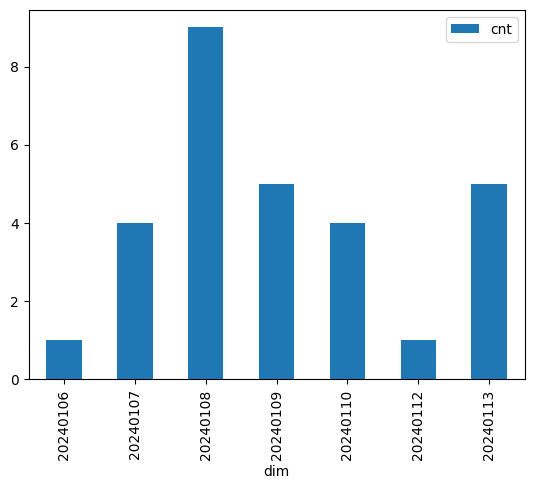

In [81]:
duckdb.connect().execute(
'''
    select
        dim,
        count(1) as cnt,
    from
        (select
            -- strftime(created_at, '%Y%W') as dim,
            strftime(created_at, '%Y%m%d') as dim,
            *
        from
            df5
        where
            year(created_at) >= 2024
        )
    group by
        dim
    order by
        dim
'''
).df().plot.bar(x='dim', y='cnt')

<Axes: xlabel='dim'>

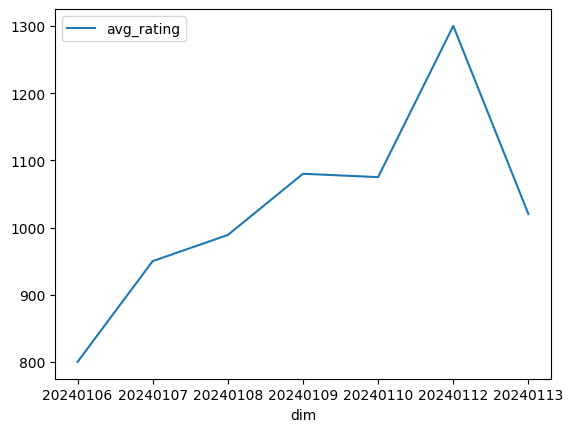

In [93]:
duckdb.connect().execute(
'''
    select
        dim,
        avg(rating) as avg_rating,
    from
        (select
            -- strftime(created_at, '%Y%W') as dim,
            strftime(created_at, '%Y%m%d') as dim,
            *
        from
            df5
        where
            year(created_at) >= 2024
        )
    group by
        dim
    order by
        dim
'''
).df().plot.line(x='dim', y='avg_rating')